In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/CatEmotionProject/images/train"
VALID_DIR = "/content/drive/MyDrive/CatEmotionProject/images/valid"

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS_INITIAL = 25    # first training
EPOCHS_FINE = 25       # fine-tuning


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_data = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 502 images belonging to 7 classes.
Found 169 images belonging to 7 classes.


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

base_model.trainable = False  # IMPORTANT


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_initial = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS_INITIAL
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 508s 15s/step - accuracy: 0.2198 - loss: 2.0765 - val_accuracy: 0.2189 - val_loss: 1.9571
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.3106 - loss: 1.8383 - val_accuracy: 0.2722 - val_loss: 1.8495
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.3821 - loss: 1.6789 - val_accuracy: 0.3432 - val_loss: 1.7692
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.4514 - loss: 1.5565 - val_accuracy: 0.3432 - val_loss: 1.7401
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.4890 - loss: 1.4744 - val_accuracy: 0.3846 - val_loss: 1.6738
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.4975 - loss: 1.4396 - val_accuracy: 0.4083 - val_loss: 1.6593
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.5071 - loss: 1.3682 - val_accuracy: 0.4260 - val_loss: 1.6072
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.5420 - loss: 1.3116 - val_accuracy: 0.

fine turn

In [ ]:
base_model.trainable = True

# Freeze first 100 layers, fine-tune the rest
for layer in base_model.layers[:100]:
    layer.trainable = False


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # VERY SMALL LR
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_fine = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS_FINE
)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 677ms/step - accuracy: 0.4885 - loss: 1.4605 - val_accuracy: 0.4556 - val_loss: 1.4523
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.5937 - loss: 1.1764 - val_accuracy: 0.4497 - val_loss: 1.4656
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.5443 - loss: 1.1369 - val_accuracy: 0.4260 - val_loss: 1.4654
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.6451 - loss: 1.0248 - val_accuracy: 0.4438 - val_loss: 1.4777
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.6814 - loss: 0.9328 - val_accuracy: 0.4379 - val_loss: 1.4836
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.6473 - loss: 0.9946 - val_accuracy: 0.4438 - val_loss: 1.5016
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.6932 - loss: 0.9644 - val_accuracy: 0.4438 - val_loss: 1.4971
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7170 - loss: 0.8340 - val_accuracy: 0

In [ ]:
model.save("/content/drive/MyDrive/CatEmotionProject/cat_emotion_image_model_finetuned.keras")
print("✅ Fine-tuned model saved to Google Drive")


✅ Fine-tuned model saved to Google Drive


predition


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt



In [ ]:
MODEL_PATH = "/content/drive/MyDrive/CatEmotionProject/cat_emotion_image_model_finetuned.keras"

IMAGE_PATHS = [
    "/content/drive/MyDrive/CatEmotionProject/test_image/test_cat.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/mycat.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/test4.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/google1.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/google2.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/google3.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/google4.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/test1.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/test2.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/test3.jpg",
    "/content/drive/MyDrive/CatEmotionProject/test_image/mycat1.jpg"

]

IMG_SIZE = (128, 128)

CLASS_NAMES = [
    "Angry",
    "Disgusted",
    "Happy",
    "Normal",
    "Sad",
    "Scared",
    "Surprised"
]


In [ ]:
model = load_model(MODEL_PATH)
print("✅ Fine-tuned image model loaded")


✅ Fine-tuned image model loaded


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


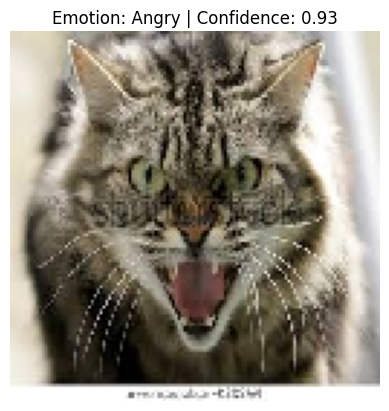

Image: test_cat.jpg
Predicted Emotion: Angry
Confidence: 0.9283503293991089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


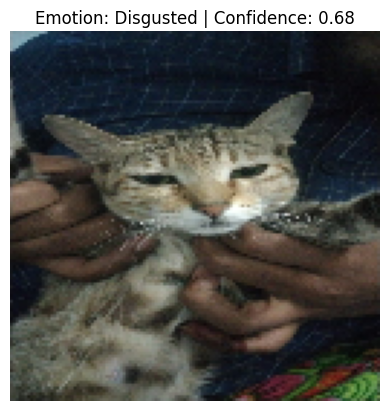

Image: mycat.jpg
Predicted Emotion: Disgusted
Confidence: 0.6780917048454285
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


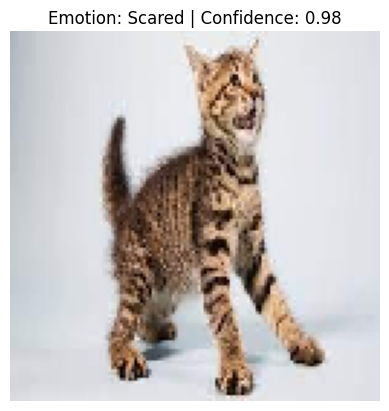

Image: test4.jpg
Predicted Emotion: Scared
Confidence: 0.9779295921325684
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


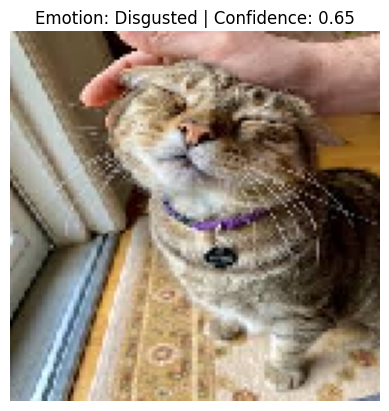

Image: google1.jpg
Predicted Emotion: Disgusted
Confidence: 0.6509647369384766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


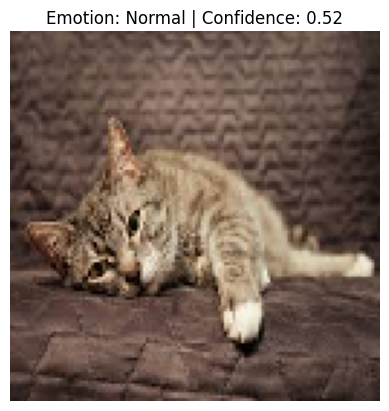

Image: google2.jpg
Predicted Emotion: Normal
Confidence: 0.5182691216468811
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


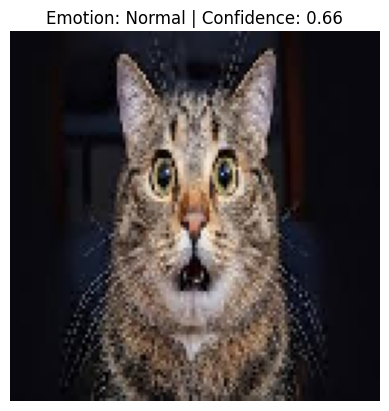

Image: google3.jpg
Predicted Emotion: Normal
Confidence: 0.6555706858634949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


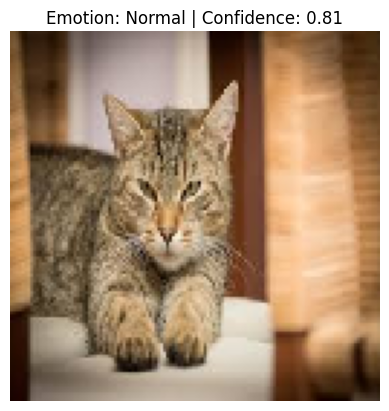

Image: google4.jpg
Predicted Emotion: Normal
Confidence: 0.8131111264228821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


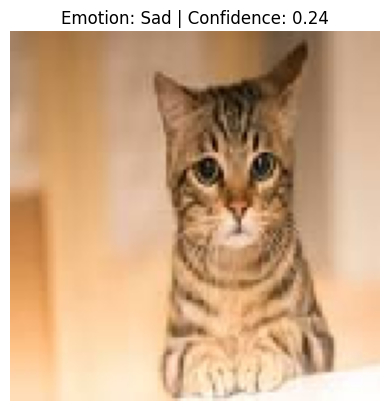

Image: test1.jpg
Predicted Emotion: Sad
Confidence: 0.23909641802310944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


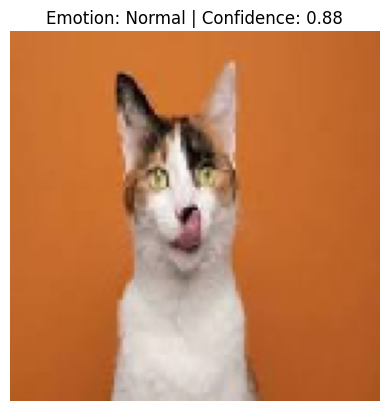

Image: test2.jpg
Predicted Emotion: Normal
Confidence: 0.875584602355957
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


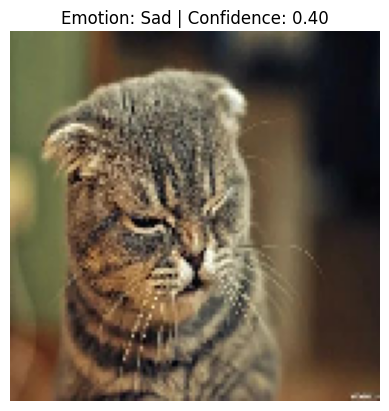

Image: test3.jpg
Predicted Emotion: Sad
Confidence: 0.39729490876197815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


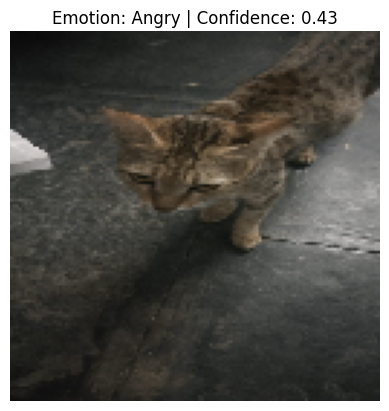

Image: mycat1.jpg
Predicted Emotion: Angry
Confidence: 0.43233272433280945


In [ ]:
for img_path in IMAGE_PATHS:
    # Load image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    idx = np.argmax(predictions)
    emotion = CLASS_NAMES[idx]
    confidence = float(predictions[0][idx])

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Emotion: {emotion} | Confidence: {confidence:.2f}")
    plt.show()

    # Print text output also
    print("Image:", img_path.split("/")[-1])
    print("Predicted Emotion:", emotion)
    print("Confidence:", confidence)

